In [16]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Run Multicolinaryty 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [17]:
df = pd.read_csv('df_clean.csv')

In [18]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

# Correlation analysis 
* Some values are very correlated and others are not
* We can see that more the team as a low rank more the overall scores are low 
* When scores are high/low in some categories it tends to be high on the others two 
* We get a confirmation than the away_team_score is negatively correlate on the result 

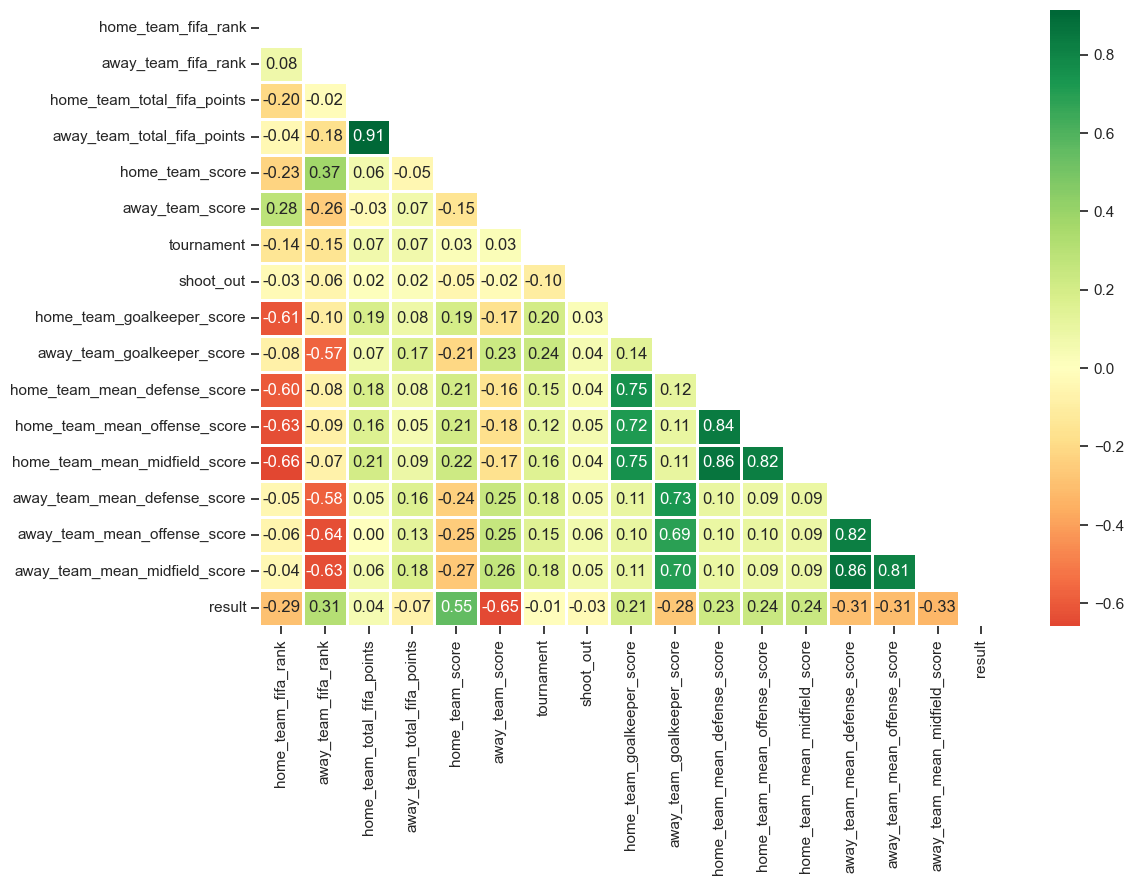

In [19]:
# Create the correlation matrix
corr_mean = df.corr(method = 'pearson')

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(12,8)) 
ax = sns.heatmap(corr_mean, mask=mask, cmap= "RdYlGn", center=0, linewidths=1, annot=True, fmt=".2f")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_yticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [20]:

sns.set_theme(style="ticks")

a = sns.pairplot(df, hue="result")

C:\Users\utilisateur\anaconda3\envs\new\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000136DC7F08B0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000136DC7F0700> (for post_execute):



KeyboardInterrupt



In [11]:
df = df.drop(['home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_mean_defense_score','home_team_score', 'away_team_score' ], axis=1)
#df.to_csv('df_for_ML_countries_not_numeric.csv', encoding='utf-8', index=True)

In [12]:
# Conversion des pays en numériques
le = preprocessing.LabelEncoder()
df['home_team'] = le.fit_transform(df['home_team'])
df['away_team'] = le.fit_transform(df['away_team'])

## Vif Analysis
* It apperars to have 3 columns over Vif>5 , we should remove it 

In [13]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(df)

const                            778.834031
home_team                          1.033695
away_team                          1.021127
home_team_fifa_rank                2.018699
away_team_fifa_rank                1.905261
tournament                         1.122293
shoot_out                          1.021713
home_team_goalkeeper_score         2.620462
away_team_goalkeeper_score         2.443715
home_team_mean_offense_score       3.399023
home_team_mean_midfield_score      3.812101
away_team_mean_defense_score       4.831086
away_team_mean_offense_score       3.819455
away_team_mean_midfield_score      4.669553
result                             1.320074
Name: VIF, dtype: float64

In [14]:
#df = df.drop(['home_team_total_fifa_points', 'away_team_total_fifa_points','home_team_mean_defense_score' ], axis=1)

#### df.to_csv('df_for_ML.csv', encoding='utf-8', index=True)

In [ ]:
df